# An introduction to Item Response Theory (IRT)

IRT is a well-known cognitive diagnosis model, and lots of introduction and discussion can be found online.
Rather than talking about the theory and recent advancement of IRT,
this tutorial would like to focus on delivering a simple but intuitive insight to IRT
from the perspective of implementation.
In addition, we provide the executable code examples for better illustration.

## Basic theory for IRT

Because our focus is on the implementation, we do not want to spend too much time on explaining the theory.
However, the basic concept is still worth mentioning for better understanding the following components.
Thus, refer to [wiki](https://en.wikipedia.org/wiki/Item_response_theory) for a simple glance

From the perspective of model, IRT is a simple latent-parameter model,
which is mostly used in transductive learning task. In most scenario,
IRT is used to estimated the user ability ($\theta$),
the item parameters like difficulty ($b$), discrimination ($a$) and pseudo-guessing ($c$).

For example, the expression of three parameter logistic model (3PL) is:

and we show the curve in the following figure:

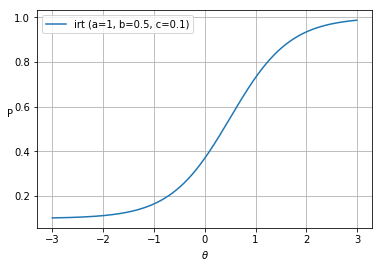

In [5]:
# visualization initialization

%matplotlib inline

import matplotlib.pyplot as plt

def render_canvas():
    plt.xlabel("$\\theta$")
    plt.ylabel("P", rotation=0)
    plt.legend()
    plt.grid()



# plot IRT curve
# import necessary package
import numpy as np
from XCD.IRT import irt3pl

# set theta range
theta = np.arange(-3, 3, 0.01)

plt.plot(theta, irt3pl(theta, 1, 0.5, 0.1), label="irt (a=1, b=0.5, c=0.1)")
render_canvas()

Then, we can change a, b and c to see how the curve changes.

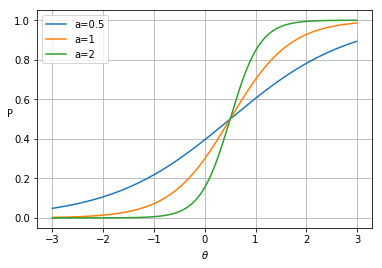

In [6]:
# change a
plt.plot(theta, irt3pl(theta, 0.5, 0.5, 0), label="a=0.5")
plt.plot(theta, irt3pl(theta, 1, 0.5, 0), label="a=1")
plt.plot(theta, irt3pl(theta, 2, 0.5, 0), label="a=2")
render_canvas()


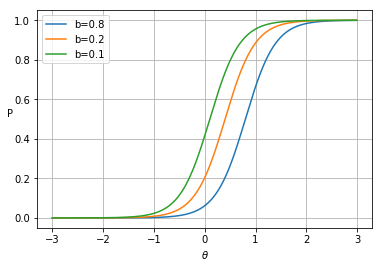

In [7]:
# change b
plt.plot(theta, irt3pl(theta, 2, 0.8, 0), label="b=0.8")
plt.plot(theta, irt3pl(theta, 2, 0.4, 0), label="b=0.2")
plt.plot(theta, irt3pl(theta, 2, 0.1, 0), label="b=0.1")
render_canvas()

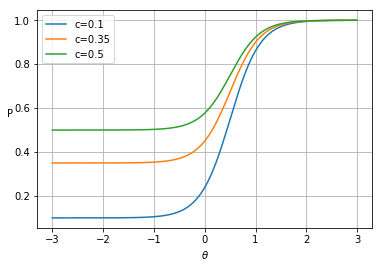

In [8]:
# change c
plt.plot(theta, irt3pl(theta, 2, 0.5, 0.1), label="c=0.1")
plt.plot(theta, irt3pl(theta, 2, 0.5, 0.35), label="c=0.35")
plt.plot(theta, irt3pl(theta, 2, 0.5, 0.5), label="c=0.5")
render_canvas()

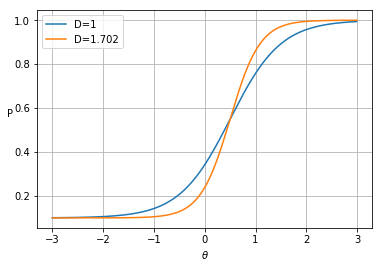

In [9]:
plt.plot(theta, irt3pl(theta, 2, 0.5, 0.1, D=1), label="D=1")
plt.plot(theta, irt3pl(theta, 2, 0.5, 0.1, D=1.702), label="D=1.702")
render_canvas()

## Solution

### Notice
Examining the open source codes, we notice that most of them set the value range of the parameters as follows:

* $\theta$: $[-\infty, \infty]$
* a : $[-\infty, \infty]$
* b : $[-\infty, \infty]$
* c : $[0, 1]$

Such setting may not affect the model performance, but validate the theory of IRT.
For example, lots of methods put no constrains on discrimination (i.e., $a$).
Based on the theory of IRT (specifically, the monotonicity), $a$ should be non-negative value, that is $a \ge 0$.

The following figure shows why $a$ should be greater than 0:

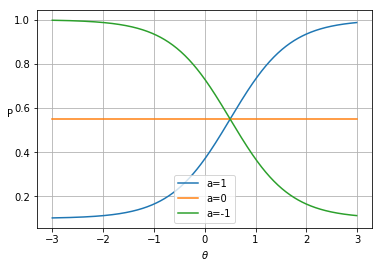

In [10]:
# change b
plt.plot(theta, irt3pl(theta, 1, 0.5, 0.1), label="a=1")
plt.plot(theta, irt3pl(theta, 0, 0.5, 0.1), label="a=0")
plt.plot(theta, irt3pl(theta, -1, 0.5, 0.1), label="a=-1")
render_canvas()

We can clearly see that, if $a<0$ (green line), the correctly answered probability $P$ decreased when $\theta$ increase.

So, in our solution, we put constraint on $a$, and similarly, we put some constraints on other variables as follows
to get a reasonable result and achieve better performance:

* $\theta$: $[-4, 4]$
* a : $[0.25, 2]$
* b : $[-2, 2]$
* c : $[0, 0.4]$


### Performance compared among different implementation

We conduct performance comparison experiments across different implementations of IRT.
The implementations we chose are those high-stared in github
and easy to be applied in new datasets with clear tutorials.
[pyirt](https://github.com/17zuoye/pyirt),
[vibo](https://github.com/mhw32/variational-item-response-theory-public)
are high-stared implementation of IRT in github.
We run them on the cdbd dataset and report the result (AUC and MAP is reported) in the following tables,
which also includes our solution:

#### AUC (auroc)

|                          | cdbd-a0910 | cdbd-lsat |
| ------------------------ | ---------- | ---------- |
| pyirt                    |    0.501737        | 0.335865 |
| bayesian-irt             |            |  |
| irt_parameter_estimation |            | |
| irt                      |            | |
| XCD-IRT-MXIRT                  |    0.703092        | 0.550503 |
| XCD-IRT-MXIRT-with-tricks          |     0.739607       | 0.673990 |

#### MAP(aupoc)
|                          | cdbd-a0910 | cdbd-lsat |
| ------------------------ | ---------- | ---------- |
| pyirt                    |    0.674690       | 0.705283 |
| bayesian-irt             |            | |
| irt_parameter_estimation |            | |
| irt                      |            | |
| XCD-IRT-MXIRT                  |     0.788603       | 0.808893 |
| XCD-IRT-MXIRT-with-tricks          |     0.826107       | 0.868745 |

The scripts we used to test the performance of the baseline implementation could be found in:
* [pyirt](../scripts/reproduction/pyirt)

### Tricks to elevate performance

#### Initialization
In order to faster the converge and achieve a better performance,
we design different initialization strategy for IRT.

* $theta$
* $a$
* $b$
* $c$

## Reference